In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math

In [104]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('train.csv')

In [105]:
X_train = df.drop(columns = ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [106]:
Y_train = df['Survived']
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

One Hot Encoding

In [107]:
#List of columns to encode
columns_to_encode = ['Sex', 'Embarked']


X_train = pd.get_dummies(X_train, columns = columns_to_encode)

X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


Solving issue of NaN values in Age Column using Simple Imputer

In [108]:
np.mean(X_train.Age)

29.69911764705882

In [109]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object
imputer = SimpleImputer(strategy='mean')

# Impute the missing values in the training data
X_train = imputer.fit_transform(X_train)

X_train

array([[ 3.        , 22.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 38.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        , 26.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 3.        , 29.69911765,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 26.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        , 32.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [110]:


import numpy as np
from sklearn.linear_model import LogisticRegression

#loading data
X = X_train
y = Y_train

# Create a logistic regression model
model = LogisticRegression(max_iter=200)

# Fit the model to the data
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate the model
accuracy = model.score(X, y)

print('Accuracy:', accuracy)




Accuracy: 0.8013468013468014


c:\Users\Akhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, input_shape=(10,)),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dense(64),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Activation('sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model
model.fit(X_train, Y_train, epochs=200)

# Evaluate the model
#test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
#print('Test loss:', test_loss)
#print('Test accuracy:', test_accuracy)

Epoch 1/200


28/28 [==============================] - 1s 2ms/step - loss: 0.7984 - accuracy: 0.6263
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.6790
Epoch 3/200
28/28 [==============================] - 0s 1ms/step - loss: 0.5809 - accuracy: 0.7138
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.7306
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7497
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.7565
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7598
Epoch 8/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.7452
Epoch 9/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4856 - accuracy: 0.7710
Epoch 10/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4630 - accuracy: 0.7991
Epoch 11/200
28/28 [=

In [119]:
predictions_cv = model.predict(X_train)
predictions_cv

28/28 [==============================] - 0s 801us/step


array([[2.36659497e-01],
       [9.98210549e-01],
       [5.91461837e-01],
       [9.97421980e-01],
       [1.39327139e-01],
       [1.07085340e-01],
       [4.81357515e-01],
       [4.01760995e-01],
       [6.27440333e-01],
       [9.86881495e-01],
       [6.08648896e-01],
       [9.79166746e-01],
       [8.32145289e-02],
       [4.95350920e-02],
       [4.12517488e-01],
       [9.20801044e-01],
       [3.80025175e-03],
       [1.84769705e-01],
       [6.81918681e-01],
       [6.52798176e-01],
       [2.25083068e-01],
       [1.79265708e-01],
       [9.25552309e-01],
       [5.50317883e-01],
       [6.13223948e-02],
       [5.21960676e-01],
       [1.15410484e-01],
       [4.63817209e-01],
       [8.29271138e-01],
       [1.52131885e-01],
       [4.45227563e-01],
       [9.97605324e-01],
       [8.26543868e-01],
       [1.10318281e-01],
       [6.42508686e-01],
       [6.09779894e-01],
       [1.15614057e-01],
       [8.53265151e-02],
       [1.70395568e-01],
       [6.50373995e-01],


28/28 [==============================] - 0s 2ms/step


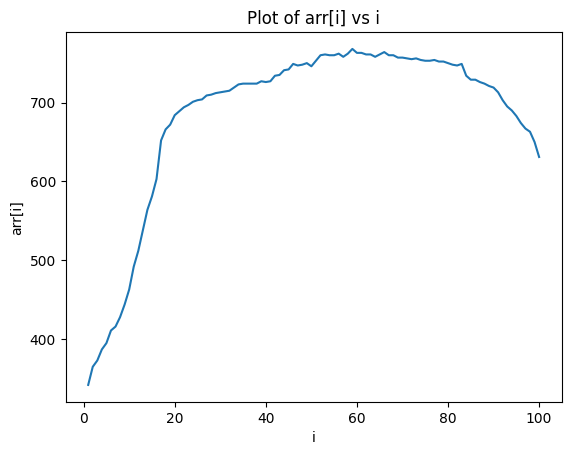

In [113]:
##cross validation code to find optimal threshold value
predictions_cv = model.predict(X_train)
arr = np.zeros(100, dtype=int)
predictions_cv = predictions_cv[:,0]
for i in range(100):
    temp = (predictions_cv<=(i/100))
    temp = temp * 1
    temp = temp ^ Y_train
    arr[i] = sum(temp)




x_axis = np.arange(1,101)

# Create a plot of arr[i] vs i
plt.plot(x_axis, arr)

# Set the axis labels
plt.xlabel('i')
plt.ylabel('arr[i]')

# Set the title of the plot
plt.title('Plot of arr[i] vs i')

# Show the plot
plt.show()

Preprocessing Test Data

In [114]:
df = pd.read_csv('test.csv')

X_test = df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])

columns_to_encode = ['Sex', 'Embarked']
X_test = pd.get_dummies(X_test, columns = columns_to_encode)

# Impute the missing values in the test data
X_test = imputer.transform(X_test)

X_test


array([[ 3.        , 34.5       ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 3.        , 47.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.        , 62.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 3.        , 38.5       ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        , 29.69911765,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        , 29.69911765,  1.        , ...,  1.        ,
         0.        ,  0.        ]])

In [115]:
# Make predictions
predictions = model.predict(X_test)

#probabilprobabilities = model.predictities(X_test)[:,1]


predictions = predictions[:,0]<=0.33

predictions = 1 * predictions

predictions



14/14 [==============================] - 0s 3ms/step


array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [116]:
df = pd.read_csv(r"C:\Users\Akhil\projects\machine learning\kaggle prac\titanic\submission.csv")

In [117]:
df["Survived"] = predictions
df.to_csv(r"C:\Users\Akhil\projects\machine learning\kaggle prac\titanic\submission.csv", index = False)

